### VAR 계산 (by historical method)

In [1]:
from datetime import datetime
import pandas as pd
import pandas_datareader.data as wb
import seaborn as sns

C:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime(2005,1,1)
end = datetime(2020,6,5)

KOSPI = wb.DataReader('^KS11', 'yahoo', start, end)

In [3]:
KP_close = KOSPI['Close']
KP_close2 = KP_close.loc['2007':'2009']
KP_close3 = pd.DataFrame(KP_close2)
KP_close4 = KP_close3.pct_change()
KP_close4.idxmin()

Close   2008-10-24
dtype: datetime64[ns]

In [4]:
KP_close4.loc['2008-10-24']

Close   -0.105705
Name: 2008-10-24 00:00:00, dtype: float64

In [5]:
KP_close4.loc['2008-10-23']

Close   -0.074811
Name: 2008-10-23 00:00:00, dtype: float64

In [7]:
KP2_close = KP_close.copy()
KP2_close2 = KP2_close.loc['2006-10-11':'2008-10-23']
KP2_close3 = pd.DataFrame(KP2_close2)
past_500 = KP2_close3.loc['2006-10-12' : '2008-10-23']

v_i_1 = past_500.copy()
v_i_2 = past_500.copy()

In [31]:
v_i_1.head(3)

,Close
Date,
2006-10-12,1331.780029
2006-10-13,1348.599976
2006-10-16,1356.719971


In [30]:
v_i_3 = v_i_2.shift()
v_i_3.head(3)

,Close
Date,
2006-10-12,NaN
2006-10-13,1331.780029
2006-10-16,1348.599976


In [29]:
past_500_change = v_i_3.div(v_i_1).dropna()
past_500_change2 = past_500_change.dropna()
past_500_change2.head(3)

,Close
Date,
2006-10-13,0.987528
2006-10-16,0.994015
2006-10-17,1.004011


In [28]:
today_price = KP2_close2.loc['2008-10-23']
tommorow_price_df = past_500_change2.applymap(lambda x : x * today_price)
tommorow_price_df.columns = ['Price']
tommorow_price_df.head(3)

,Price
Date,
2006-10-13,1036.617817
2006-10-16,1043.427427
2006-10-17,1053.920237


In [27]:
today_price_df = past_500_change2.copy()
today_price_df['Close'] = today_price
today_price_df.columns = ['Price']
today_price_df.head(3)

,Price
Date,
2006-10-13,1049.709961
2006-10-16,1049.709961
2006-10-17,1049.709961


In [25]:
expect_change = tommorow_price_df.sub(today_price_df)
VaR_99_daily = expect_change['Price'].sort_values()[4]
VaR_99_daily

-45.68657792380395

In [37]:
pd.DataFrame(expect_change['Price'].sort_values())

,Price
Date,
2008-10-14,-60.755692
2007-08-20,-56.509409
2008-09-08,-51.374773
2007-11-26,-46.648595
2008-09-19,-45.686578
...,...
2008-10-08,64.784453
2008-09-16,68.205652
2007-08-16,78.115001


In [36]:
KP_close.loc['2008-10-21' : '2008-10-26']

Date
2008-10-21    1196.099976
2008-10-22    1134.589966
2008-10-23    1049.709961
2008-10-24     938.750000
Name: Close, dtype: float64

In [37]:
KP_close.loc['2008-10-24'] - KP_close.loc['2008-10-23']

-110.9599609375

In [33]:
expect_change.head(3)

,Price
Date,
2006-10-13,-13.092144
2006-10-16,-6.282534
2006-10-17,4.210276


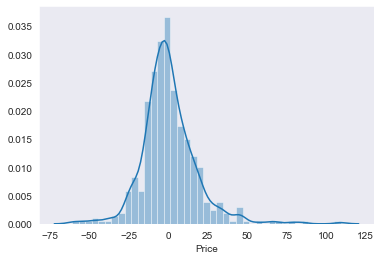

In [34]:
sns.set_style('dark')
sns.distplot(expect_change['Price'])

In [35]:
pd.DataFrame(KP_close.loc['2008-10-21' : '2008-10-26'])

,Close
Date,
2008-10-21,1196.099976
2008-10-22,1134.589966
2008-10-23,1049.709961
2008-10-24,938.750000
